<a href="https://colab.research.google.com/github/muhamadfarrelrizqullah/PCVK_Ganjil_2023/blob/main/Week5_Mfarrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Praktikum 5 PCVK**


1. Buat Gamma Correction sesuai dengan petunjuk berikut

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


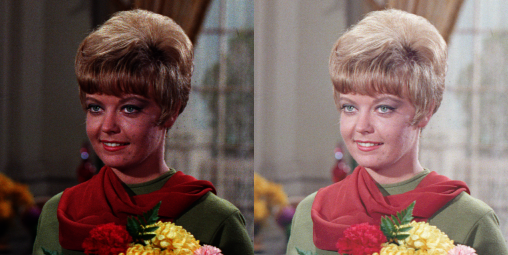

In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma Correction pada citra')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, bukan angka')

# Membaca citra
image = cv2.imread('/content/drive/MyDrive/Pcvk/female.tiff')

# Membuat citra simulasi dengan gamma correction
gamma_corrected = np.zeros(image.shape, image.dtype)
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      gamma_corrected[y,x,c] = np.clip(255 * pow  (image[y,x,c] / 255, (1 / gamma)), 0, 255)

# Menampilkan citra asli dan citra yang sudah diperbaiki gamma
final_frame=cv2.hconcat ((image, gamma_corrected))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111. Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

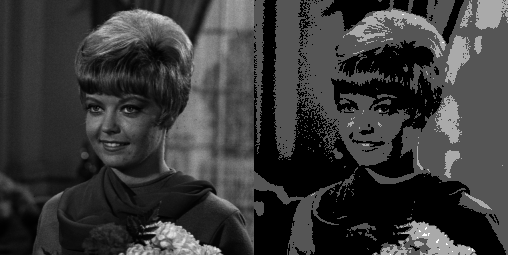

In [27]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Tingkat kedalaman yang diinginkan (misalnya, 2-bit)
bit_depth = 2
bit = 2**bit_depth
level = 255 / (bit - 1)

# Membaca citra masukan
original = cv2.imread('/content/drive/MyDrive/Pcvk/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Membuat citra simulasi dengan tingkat kedalaman yang diinginkan
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255);

# Menampilkan citra asli dan citra yang sudah diperbaiki dengan depth image
final_frame = cv2.hconcat((original, depth_image))
cv2_imshow(final_frame)

3. Buat modul Average Denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

Hasil PSNR akan mencerminkan sejauh mana citra asli telah berhasil didenoising dengan citra rata-rata noise. Kesimpulan dapat ditarik berdasarkan nilai PSNR, semakin tinggi nilai PSNR, semakin baik kualitas denoising.

Average Denoising
----------------------------------
Masukkan nilai: 5
29.124750332611278


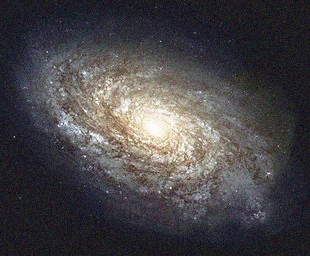

In [68]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pcvk/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Average Denoising
----------------------------------
Masukkan nilai: 30
28.934748151382024


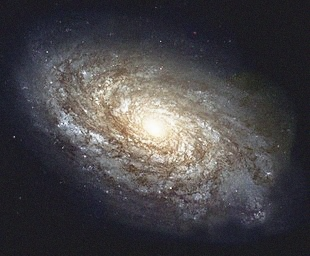

In [69]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pcvk/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Average Denoising
----------------------------------
Masukkan nilai: 60
28.922138021299197


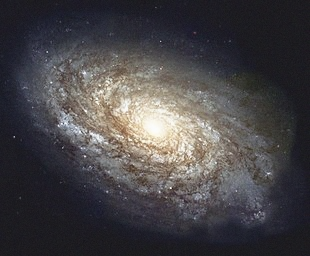

In [70]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pcvk/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Average Denoising
----------------------------------
Masukkan nilai: 80
28.914050052172886


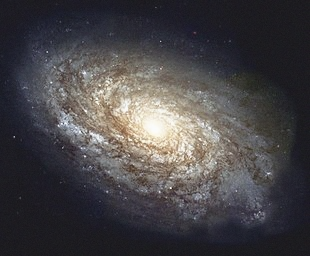

In [71]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pcvk/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

Average Denoising
----------------------------------
Masukkan nilai: 100
28.92147794647041


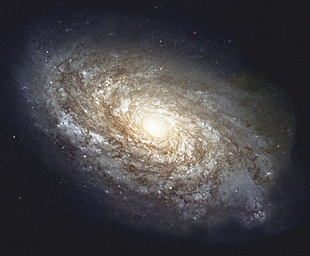

In [72]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import glob

print('Average Denoising')
print('----------------------------------')
try:
 photo_number = int(input('Masukkan nilai: '))
except ValueError:
 print('Error, not a number')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Pcvk/noises/*.jpg'):
  n= cv2.imread(img)
  cv_img.append(n)

avg_denoised_img = np.mean(cv_img[:photo_number], axis=0).astype(np.uint8)

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print(PSNR(cv_img[0], avg_denoised_img))
cv2_imshow(avg_denoised_img)

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

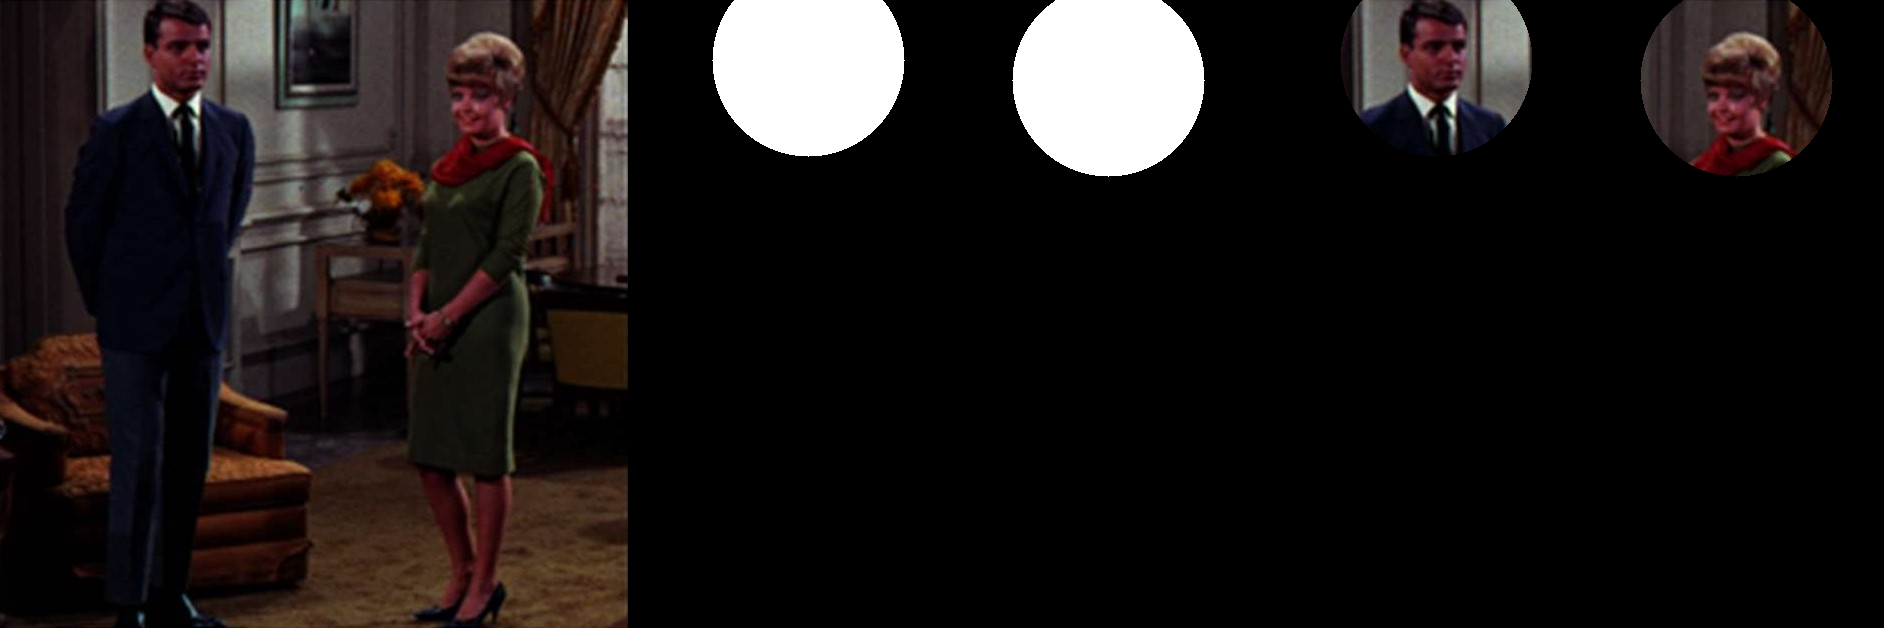

In [53]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/Pcvk/Cpl.jpg'
original_image = cv2.imread(image_path)


center1 = (180, 60)
radius1 = 96
center2 = (480, 80)
radius2 = 96

mask = np.zeros_like(original_image, dtype=np.uint8)
cv2.circle(mask, center1, radius1, (255, 255, 255), -1)
cv2.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv2.bitwise_and(original_image, mask)

final_frame = cv2.hconcat((original_image, mask,masked_image))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

Analisa OR

Operasi Bitwise OR tidak selalu cocok untuk penggabungan gambar dengan mask. Bitwise OR akan menggabungkan bit dalam setiap saluran warna (Biru, Hijau, Merah) dari gambar, yang mungkin tidak menghasilkan hasil yang diharapkan.

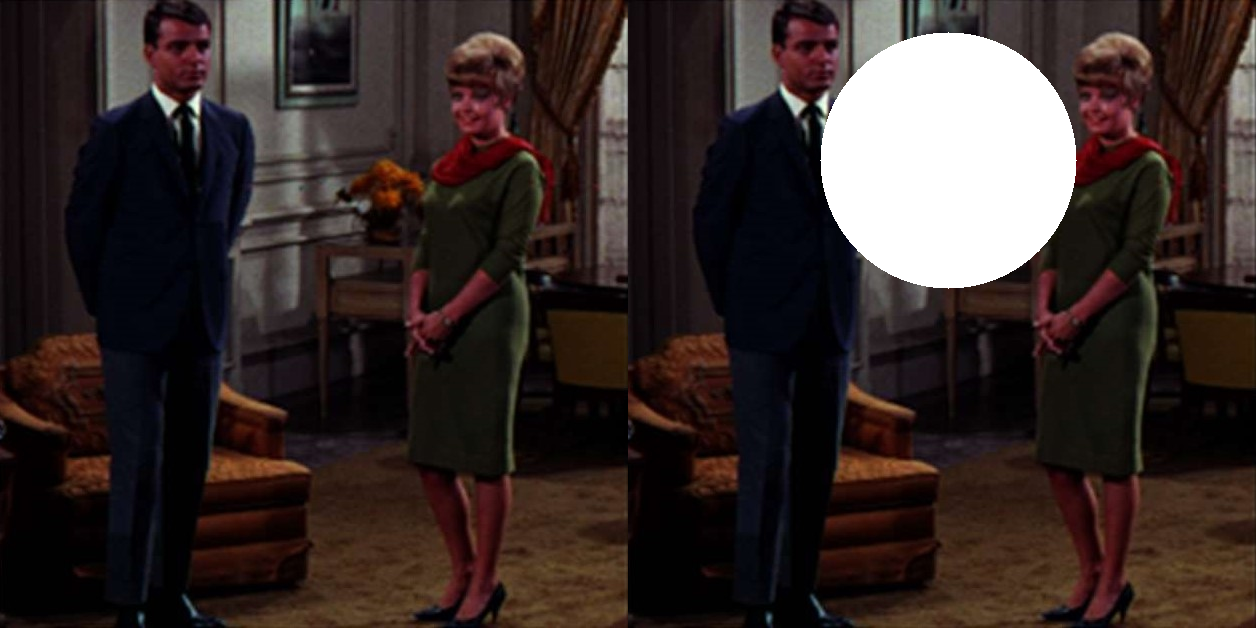

In [63]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Pcvk/Cpl.jpg')

mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.circle(mask, (320,160), 128, (255,255,255), -1)

result = image | mask

org_frame = cv2.hconcat((image, result))
cv2_imshow(org_frame)

Analisa NOT

Operator bitwise NOT (~) untuk menggabungkan gambar asli dan mask. Ini berarti semua piksel dalam gambar asli dan mask yang semula menjadi negative, sedangkan piksel yang semula putih menjadi hitam.

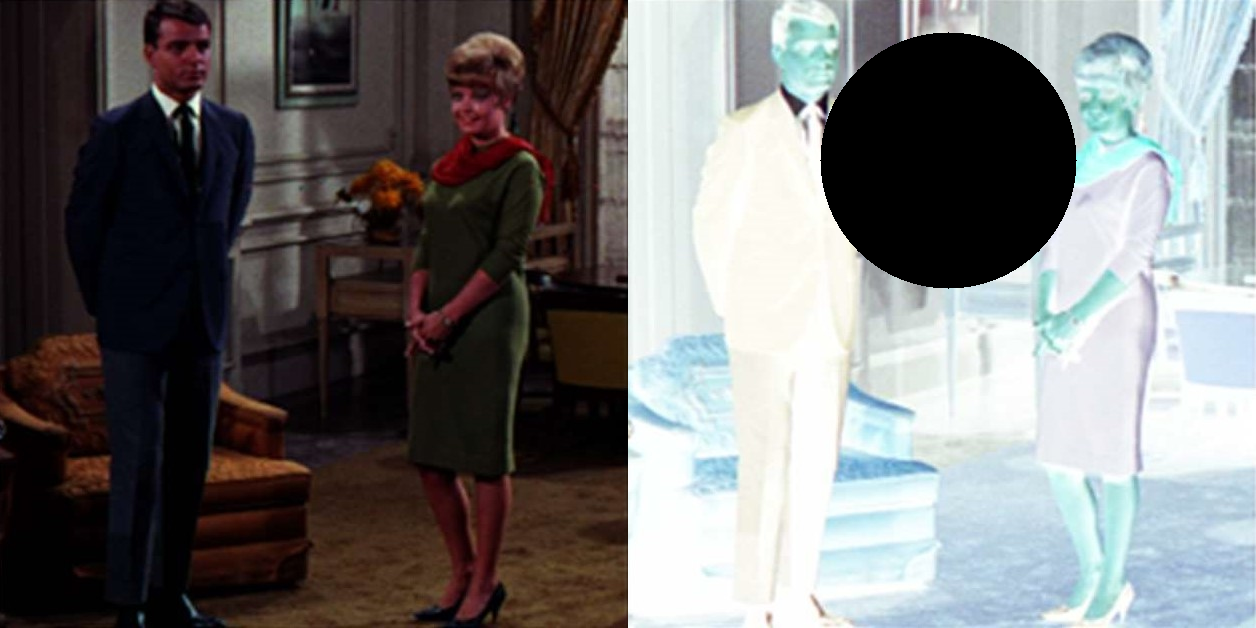

In [64]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Pcvk/Cpl.jpg')

mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.circle(mask, (320,160), 128, (255,255,255), -1)

result = ~image & ~mask

org_frame = cv2.hconcat((image, result))
cv2_imshow(org_frame)

Analisa NAND

operasi bitwise NAND adalah gabungan dari operator AND dan kemudian mengubahnya menjadi negatif dengan operator NOT. Hasil dari operasi ini adalah gambar dengan seluruh area lingkaran negative, sehingga area di luar menjadi putih.

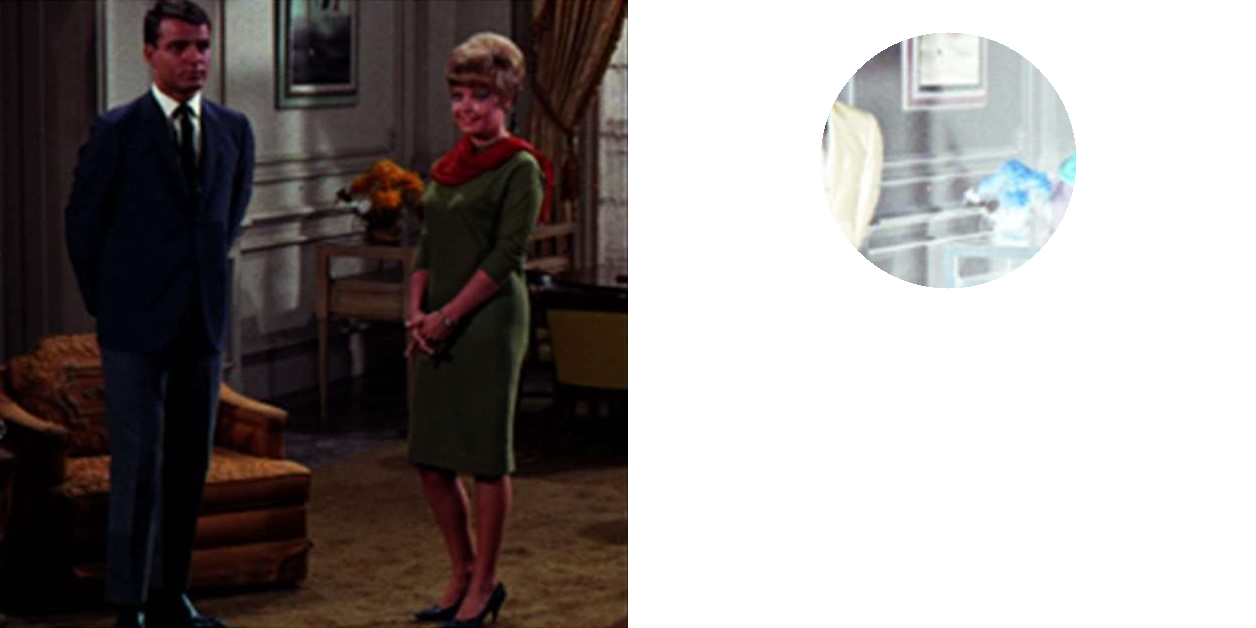

In [66]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Pcvk/Cpl.jpg')

mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.circle(mask, (320,160), 128, (255,255,255), -1)

result = cv2.bitwise_not(cv2.bitwise_and(image, mask))

org_frame = cv2.hconcat((image, result))
cv2_imshow(org_frame)

Analisa XOR

Operasi XOR akan menghasilkan perbedaan antara kedua gambar. Hasilnya adalah gambar asli untuk diluar mask dan mask yang didalam menjadi negative.

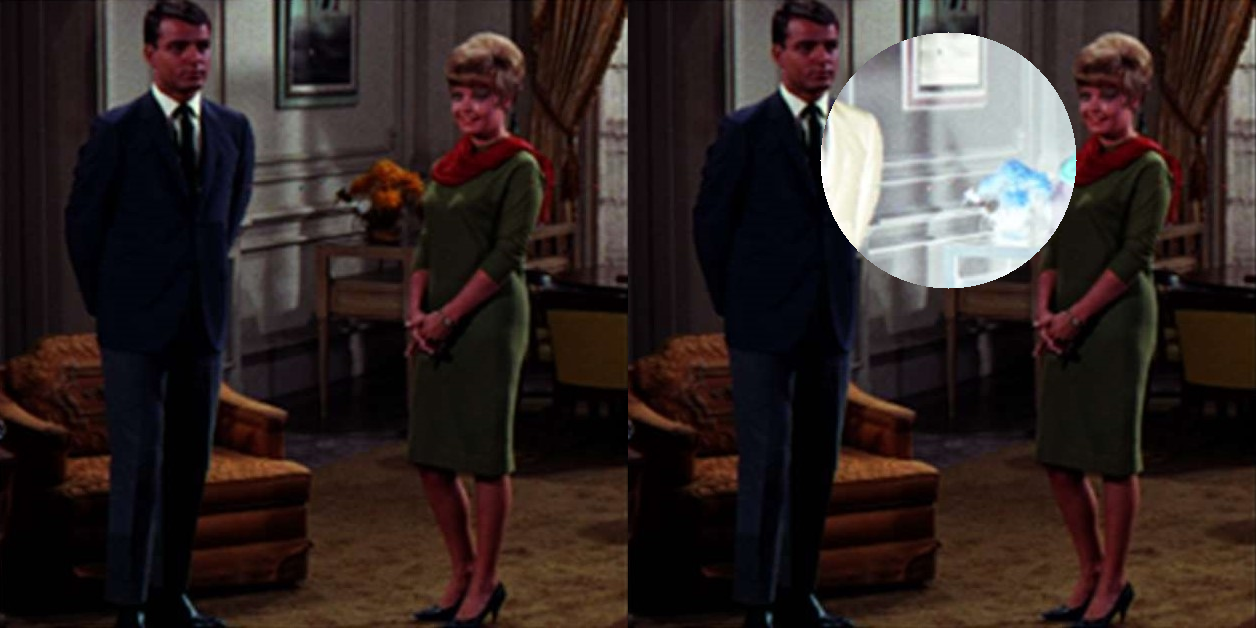

In [67]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/drive/MyDrive/Pcvk/Cpl.jpg')

mask = np.zeros(image.shape, dtype=np.uint8)
mask = cv2.circle(mask, (320,160), 128, (255,255,255), -1)

result = cv2.bitwise_xor(image, mask)

org_frame = cv2.hconcat((image, result))
cv2_imshow(org_frame)